In [1]:
# pip install --upgrade pip
# pip install konlpy

SyntaxError: invalid syntax (3007920093.py, line 2)

In [2]:
def make_folder_path(folder_type="Training", data_type="Label_Data"):
    '''
    폴더까지의 주소를 리턴해주는 함수
    folder_type = "Training" # or 'Validation'
    data_type = "Origin" # or 'Labeling'
    '''
    folder_path = f"C:/Users/Admin/Desktop/stt_data/{folder_type}/{data_type}/D02/"
    return folder_path

def make_file_path(path=make_folder_path(), file_type="wav", j_folder_num="05",s_folder_no="01", file_no="0001"):
    '''
    파일까지의 주소를 리턴해주는 함수
    folder_no : "01"~"30"
    file_no : 각각 다름
    '''
    sound_file_folder = f"S0000{s_folder_no}"
    file_path = f"{path}/J{j_folder_num}/{sound_file_folder}/{file_no}.{file_type}"

    return file_path

# folder_path = make_folder_path()
# file_path = make_file_path()


### JSON 파일만 복사하기

In [7]:
import os
import shutil
from tqdm import tqdm
# JSON 파일만 복사하기

# 원본 디렉터리와 대상 디렉터리 경로 설정
source_directory = 'C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J12'
destination_directory = 'C:/Users/Admin/Desktop/stt_data/json_file/json_08'

# 대상 폴더가 존재하지 않으면 생성
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# JSON 파일 리스트 가져오기
json_files = []
for root, dirs, files in os.walk(source_directory):
    for file_name in files:
        if file_name.lower().endswith('.json'):  # JSON 파일만 필터링
            json_files.append(os.path.join(root, file_name))

# JSON 파일 복사하면서 진행 상황 표시
for source_file_path in tqdm(json_files, desc="Copying JSON files", unit="file"):
    destination_file_path = os.path.join(destination_directory, os.path.basename(source_file_path))
    shutil.copy2(source_file_path, destination_file_path)  # 파일 복사

Copying JSON files: 100%|██████████| 5816/5816 [00:03<00:00, 1608.54file/s]


In [11]:
# json 파일 열기 
import os 

# 폴더 경로 설정
root_directory = 'C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05'

# JSON 파일만 열기
# cnt = 0
for root, dirs, files in os.walk(root_directory):
    # if cnt > 20:
    #     break
    for file_name in files:
        if file_name.lower().endswith('.json'):  # JSON 파일만 필터링
            file_path = os.path.join(root, file_name)
            print(f'Opening JSON file: {file_path}')
            os.startfile(file_path)
    # cnt += 1

Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000001\S000001.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000002\S000002.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000003\S000003.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000004\S000004.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000005\S000005.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000006\S000006.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000007\S000007.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000008\S000008.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000009\S000009.json
Opening JSON file: C:/Users/Admin/Desktop/stt_data/Training/Label_Data/D02/J05\S000010\S000010.json


### JSON 파일 열어서 하나의 리스트 / 딕셔너리로 만들기 + 정규표현식으로 1차 전처리

In [3]:
# list로 text 통합해서 subcategory : text 로 dictionary 구성하기
import json
import os
import re

def text_to_list(file_num = "01"):
    dialog = []
    root_directory = f'C:/Users/Admin/Desktop/stt_data/json_file/json_{file_num}/'
    root_directory_list = os.listdir(root_directory)
    for i in range(len(root_directory_list)):
        file_path = str(root_directory)+str(root_directory_list[i])
        try:
            target_file = open(file_path, encoding="UTF-8")
            json_file = json.loads(target_file.read())
            speakers = json_file['dataSet']['typeInfo']['speakers']
            for speaker in speakers:
                if '고객' in speaker['type']:
                    category = json_file['dataSet']['typeInfo']['subcategory']
                    for txt in json_file['dataSet']['dialogs']:
                        dialog.append(txt['text'])
        except:
            print(f"error! {file_path}")    
    # 텍스트 데이터 전처리 regex
    text_list = []
    for text in dialog:
        result = re.sub(r'o/ ', r'', text)
        result = re.sub(r'n/', r'', result)
        result = re.sub(r'\(\(\)\)',r'', result)
        result = re.sub(r'/\(([^)]+)\)', r'', result)
        result = re.sub(r'\(', r'', result, count=10)
        result = re.sub(r'\)', r'', result, count=10)
        result = re.sub(r'/', r'', result, count=10).strip()
        text_list.append(result)
    return {category : text_list}

In [29]:
# 다른 파일도 같이 변경 시 dictionary type으로 저장 --> 굳이 그럴 필요가 없는 것 같아서 일단 중지
import json
import re
import os
from collections import defaultdict

dialog_dict = defaultdict(list)
root_directory = 'C:/Users/Admin/Desktop/stt_data/json_file/json_01/'
root_directory_list = os.listdir(root_directory)

txt_list = []
for i in range(len(root_directory_list)):
    file_path = str(root_directory)+str(root_directory_list[i])
    try:
        target_file = open(file_path, encoding="UTF-8") # json file load
        json_file = json.loads(target_file.read())
        speakers = json_file['dataSet']['typeInfo']['speakers']
        category = json_file['dataSet']['typeInfo']['subcategory']
        for speaker in speakers:
            if '고객' in speaker['type']: # 고객이 존재하는 대화만 필터링
                for txt in json_file['dataSet']['dialogs']: # 텍스트 전처리 regex
                    text = txt['text']
                    result = re.sub(r'o/ ', r'', text)
                    result = re.sub(r'n/', r'', result)
                    result = re.sub(r'\(\(\)\)',r'', result)
                    result = re.sub(r'/\(([^)]+)\)', r'', result)
                    result = re.sub(r'\(', r'', result, count=10)
                    result = re.sub(r'\)', r'', result, count=10)
                    result = re.sub(r'/', r'', result, count=10).strip()
                    txt_list.append(result)                
        dialog_dict[f"{category}"] = txt_list     
    except:
        print(f"error! {file_path}")
print(list(dialog_dict.keys()))
dialog_dict

['복지']


defaultdict(list,
            {'복지': ['네, 안녕하세요?',
              '네, 안녕하십니까?',
              '다름이 아니고 저희 아들이 디딤 씨앗 통장을.',
              '해지하려고 하는데요.',
              '죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.',
              '네, 알겠습니다.',
              '고객님 혹시라도 연결 중 전화가 끊긴다면.',
              '예, 담당자 바로 연결해드리겠습니다.',
              '네, 알겠습니다.',
              '네, 좋은 상담 이어 가세요.',
              '고객님께서 디딤 씨앗 통장 해지 관련으로 문의하세요.',
              '네, 연결해 주세요.',
              '네, 수고하세요.',
              '아 저 몇 가지 여쭤볼 게 있어가지고요.',
              '여쭤보려면 어디로 통화를 해야 되나요?',
              '혹시 어떤 불편사항이신가요? 고객님.',
              '이니 아니 불편사항은 아니라 좀 궁금한 거 때문에.',
              '내용이신지 말씀해 주시면 제가 답변해드릴 수 있는 내용은 답변해드리고요. 만약 담당자 연결이 필요하면 연결을 해드리도록 하겠습니다.',
              '아 그래요? 1가지만 좀 궁금한 건데.',
              '지금 여기 제가 사는 곳이.',
              '그 국공립 어린이집 이번에 저기 세워진 데예요.',
              '아 그런데 그 아이들 그 이 그 비율 보니까.',
              '어 입주민에서는 60%로 돼 있더라고요.',
              '근데 그 60%를 이게 뭐 딱 케 뭐 정해져 인제 법률적으로 정해진 부분 그런 건 아닌 거 같

### csv 파일로 저장하기

In [4]:
import pandas as pd

welfare_df = pd.DataFrame(text_to_list("01"))
print(welfare_df['복지'].isnull().sum())
welfare_df.head()

0


,복지
0,"네, 안녕하세요?"
1,"네, 안녕하십니까?"
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.
3,해지하려고 하는데요.
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.


In [5]:
traffic_df = pd.DataFrame(text_to_list("02"))
print(traffic_df['교통및차량등록'].isnull().sum())
traffic_df.head()

0


,교통및차량등록
0,네 저기 차를 타 명의 그 이제 좀 바꿀려고 하는데 뭐 뭐 필요해요?
1,아 예 그럼 저 몇 가지만 여쭙고 안내 해 드리도록 하겠습니다.
2,"네 실례지만 회사 차량을 기존에 개인 분 께서 단독명의로 보유중이셨고,"
3,이제 차량을 다른 개인 분 단독명의로 개인 간 이전 등록하시는 것이 맞습니까?
4,예 예 맞아요 개인 대 개인.


In [7]:
water_df = pd.DataFrame(text_to_list("03"))
print(water_df['상하수도'].isnull().sum())
water_df.head()

0


,상하수도
0,"어, 그 저수조."
1,"아, 그 하는 데 좀 돌려 주세요."
2,잠시만 기다려 주시겠습니까?
3,"네, 전달 안내 도움드릴 건데요."
4,어느 쪽으로 안내해 드릴까요?


In [8]:
environ_df = pd.DataFrame(text_to_list("04"))
print(environ_df['환경'].isnull().sum())
environ_df.head()

0


,환경
0,"네, 안녕하세요."
1,아 뭐 좀 물어볼라 그러는데요.
2,예 무엇을 도와드릴까요?
3,디젤 자동차 폐차를 시키면은
4,그 지원금이 나와요?


In [9]:
city_df = pd.DataFrame(text_to_list("05"))
print(city_df['도시및경제'].isnull().sum())
city_df.head()

0


,도시및경제
0,함께하는 상담사
1,네. 뭐 좀 여쭤보려고 전화드렸습니다.
2,네. 무엇을 도와드릴까요?
3,아 건축 쪽인데요잉.
4,그 아파트 일조권 때문에 문의 좀 드릴라고 전화드렸어요.


In [10]:
culture_df = pd.DataFrame(text_to_list("06"))
print(culture_df['문화및관광'].isnull().sum())
culture_df.head()

0


,문화및관광
0,저는 공무원은 아닙니다 고객님.
1,그럼 뭐예요?
2,저는 상담사입니다.
3,상담사입니다 고객님. 민원 콜센터 상담사입니다.
4,그러면 뭐예요 그 좀 이게


In [11]:
admin_df = pd.DataFrame(text_to_list("07"))
print(admin_df['일반행정'].isnull().sum())
admin_df.head()

0


,일반행정
0,"예, 아유 수고하세요."
1,여쭤볼려고 그러는데요.
2,그 지금 그거 뭘로 들어가 있어요?
3,"예, 알겠습니다."
4,다른 더 확인해 드릴 것은 없으십니까?


In [12]:
etc_df = pd.DataFrame(text_to_list("08"))
print(etc_df['기타민원'].isnull().sum())
etc_df.head()

0


,기타민원
0,무엇을 도와드릴까요?
1,네 안녕하십니까.
2,다른거 아니고 지금 창원 지역에 있는
3,공단 그 그 위스에 있는 공장 업체 중에
4,거 방문을 해가지고 좀 그 영업을 하고 싶은데


In [123]:
welfare_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_welfare.csv', index=False)
traffic_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_traffic.csv', index=False)
water_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_water.csv', index=False)
environ_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_environ.csv', index=False)
city_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_city.csv', index=False)
culture_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_culture.csv', index=False)
admin_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_admin.csv', index=False)
etc_df.to_csv('C:/Users/Admin/Desktop/stt_data/csv_file/sub_etc.csv', index=False)

### 불용어 제거, 형태소 분석기로 토큰화 진행

#### 한국어 불용어 리스트 참고 자료
https://www.ranks.nl/stopwords/korean

#### konlpy 형태소 분석기별 품사 태그 spreadsheet 자료 
https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0

In [11]:
# 형태소 분석기 테스트
from konlpy.tag import Komoran  
komoran = Komoran()
text = list(welfare_df['복지'])[2]
morphs = komoran.morphs(text)
print(morphs)
pos = komoran.pos(text)
print(pos)

['다르', 'ㅁ', '이', '아니', '고', '저희', '아들', '이', '디디', 'ㅁ', '씨앗', '통장', '을', '.']
[('다르', 'VA'), ('ㅁ', 'ETN'), ('이', 'JKS'), ('아니', 'VCN'), ('고', 'EC'), ('저희', 'NP'), ('아들', 'NNG'), ('이', 'JKS'), ('디디', 'VV'), ('ㅁ', 'ETN'), ('씨앗', 'NNG'), ('통장', 'NNG'), ('을', 'JKO'), ('.', 'SF')]


In [8]:
from konlpy.tag import Kkma  
kkma = Kkma()
text = list(welfare_df['복지'])[2]
morphs = kkma.morphs(text)
print(morphs)
pos = kkma.pos(text)
print(pos)

['다르', 'ㅁ', '이', '아니', '고', '저희', '아들', '이', '디디', 'ㅁ', '씨앗', '통장', '을', '.']
[('다르', 'VA'), ('ㅁ', 'ETN'), ('이', 'JKS'), ('아니', 'VV'), ('고', 'ECE'), ('저희', 'NP'), ('아들', 'NNG'), ('이', 'JKS'), ('디디', 'VV'), ('ㅁ', 'ETN'), ('씨앗', 'NNG'), ('통장', 'NNG'), ('을', 'JKO'), ('.', 'SF')]


In [5]:
from konlpy.tag import Okt  
okt = Okt()
text = list(welfare_df['복지'])[2]
morphs = okt.morphs(text)
print(morphs)
pos = okt.pos(text)
print(pos)
phrases = okt.phrases(text)
print(phrases)

['다름이', '아니고', '저희', '아들', '이', '디딤', '씨앗', '통장', '을', '.']
[('다름이', 'Adjective'), ('아니고', 'Adjective'), ('저희', 'Noun'), ('아들', 'Noun'), ('이', 'Josa'), ('디딤', 'Verb'), ('씨앗', 'Noun'), ('통장', 'Noun'), ('을', 'Josa'), ('.', 'Punctuation')]
['저희', '저희 아들', '씨앗', '씨앗 통장', '아들', '통장']


In [16]:
# 제외 품사 설정
exclusion_tags_Okt = [
    'Josa', 'Punctuation', 'Conjunction',
    # 조사, 구두점, 접속사
    'PreEomi', 'Eomi', 'Suffix', 'Number'
    # 선어말어미, 어미, 접미사, 숫자
]

exclusion_tags_Komoran = [
    'NNBC', 'VX', 'IC',
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
    'JX', 'JC',
    'SF', 'SP', 'SS', 'SE', 'SO',
    'EP', 'EF', 'EC', 'ETN', 'ETM',
    'XSN', 'XSV', 'XSA', 'XPN'
]
# 불용어 리스트 출력
path = 'C:/Users/Admin/Desktop/stt_data/korean_stopwords.txt'
with open(path, 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopword_list = [x.strip() for x in stopwords]
stopword_list += ['의', '가', '이', '은', '들', '는', '좀',
                  '잘', '걍', '과', '도', '를', '으로', '자', '에',
                  '와', '한', '하다']

# Okt로 품사 태깅
from konlpy.tag import Okt
okt = Okt()

# Komoran으로 품사 태깅
from konlpy.tag import Komoran
komoran = Komoran()

text_list = list(admin_df['text'])[:100]

f = lambda x: x in exclusion_tags_Komoran
s = lambda x: x in stopword_list
word_list = []
sentence_list = []
for text in text_list:
    # pos = okt.pos(text)
    pos = komoran.pos(text)
    sentence = str()
    for p in pos:
        if (f(p[1]) is False) and (s(p[0]) is False):
            word_list.append(p[0])
    #         sentence += p[0]
    # sentence_list.append(sentence)


print(len(word_list))
print(word_list)
# print(len(sentence_list))
# print(sentence_list)

476
['수고', '여쭈', '그렇', '지금', '그것', '뭐', '들어가', '알', '더', '확인', '드릴', '없', '좋은 하루', '보내', '안녕하세요', '돕', '통장', '교육', '청소년', '찍히', '보내', '교육', '청소년', '입금', '되', '말씀', '출처', '모르', '고객', '뭐', '학자금 대출', '이자', '관련', '신청', '적', '없', '이자', '학자금 대출', '이자', '내용', '신청', '적', '없', '고객', '국가', '장학금', '신청', '20', '20', '28', '만', '원', '안', '되', '그렇', '죄송', '제가', '해당', '부서', '문의', '해', '드릴', '텐', '데', '청', '교육', '청소년', '로만', '확인', '되', '걸', '입금', '되', '확인', '가능', '12월 28일', '날', '280000', '원', '280200', '원', '그렇', '기다리', '제가', '부서', '문의', '안내', '안녕하세요', '선생님', '고객', '12월 28일', '이십', '교육', '청소년', '280200', '원', '입금', '되', '내역', '있', '내용', '확인', '가능', '12월 28일', '얼', '280200', '원', '교육', '청소년', '입금', '입금', '받', '거', '고객', '확인', '확인', '전화', '드리', '되', '주', '확신', '필요', '확인', '어렵', '그렇', '번호', '고객', '안내', '드리', '되', '지금', '번호', '제가', '일산', '번호', '전화', '드리', '제가', '고객', '연락처', '안내', '성함', '성함', '제가', '안', '여쭈', '번', '제가', '실례', '선생님', '성함', '여쭈', '감사', '수고', '고객', '기다리', '감사', '너무', '죄송', '부서', '내용', '접수', 

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = text_list
tfidfvec = TfidfVectorizer(analyzer='word').fit(corpus)
print(tfidfvec.vocabulary_.items())
print('-----------------')
print(tfidfvec.transform(corpus))

tmp = tfidfvec.transform(corpus).toarray()
features = tfidfvec.get_feature_names_out()
pd.DataFrame(tmp,columns=features)

dict_items([('아유', 169), ('수고하세요', 162), ('여쭤볼려고', 197), ('그러는데요', 45), ('지금', 263), ('그거', 42), ('뭘로', 134), ('들어가', 104), ('있어요', 232), ('알겠습니다', 181), ('다른', 72), ('확인해', 314), ('드릴', 102), ('것은', 24), ('없으십니까', 194), ('그럼', 49), ('좋은', 256), ('하루', 279), ('보내세요', 146), ('여보세요', 195), ('안녕하세요', 179), ('무엇을', 129), ('도와드릴까요', 83), ('통장에', 273), ('교육청소년과로', 37), ('해서', 297), ('찍혔는데', 265), ('혹시', 303), ('보내주셨나', 147), ('해서요', 298), ('입금이', 225), ('됐다는', 87), ('말씀이십니까', 119), ('출처를', 270), ('모르겠어가지고', 128), ('고객님', 26), ('학자금', 290), ('대출', 79), ('이자', 214), ('관련으로', 31), ('신청하신', 163), ('적은', 241), ('이자요', 215), ('이런', 213), ('내용으로', 67), ('없으셨어요', 193), ('국가', 41), ('장학금으로', 237), ('신청했는데', 164), ('20', 1), ('28만', 6), ('원밖에', 211), ('돼서', 84), ('그렇습니다', 52), ('죄송합니다만', 258), ('그러면', 46), ('제가', 255), ('해당', 292), ('부서로', 154), ('문의를', 131), ('해드릴', 295), ('텐데', 271), ('교육', 34), ('청소년과로만', 269), ('확인이', 312), ('되시는', 92), ('건가요', 21), ('언제', 185), ('얼마가', 187), ('됐는지', 86), ('확인', 3

,12월,20,280000원,280200원이,280200원이라고,280200원인가,28만,28일,28일이십,28일입니다,...,확신이,확인,확인은,확인을,확인이,확인한,확인해,확인해서,효천지구,효천지구까지는
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.476853,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### 의도 분류 모델 구축해보기(가모델)

In [2]:
import os
import pandas as pd

df_list = []
root_directory = "C:/Users/Admin/Desktop/stt_data/csv_file/"
root_directory_list = os.listdir(root_directory)
for i in range(len(root_directory_list)):
    file_path = os.path.join(root_directory, root_directory_list[i]) 
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        df_list.append(df)
    except:
        print(f'error in {file_path}')

df_list

[                                                     일반행정
 0                                            예, 아유 수고하세요.
 1                                            여쭤볼려고 그러는데요.
 2                                     그 지금 그거 뭘로 들어가 있어요?
 3                                               예, 알겠습니다.
 4                                   다른 더 확인해 드릴 것은 없으십니까?
 ...                                                   ...
 179512              토지라 하셨고요. 제가 번호 안내 도와드릴 텐데 메모 가능하십니까?
 179513  다만 지금 1시까지가 네, 점심시간이라 연결이 좀 지연될 수 있는 점은 양해 부탁드...
 179514                                          네, 알겠습니다.
 179515                                   더 다른 문의사항 있으십니까?
 179516                                         아니요. 없습니다.
 
 [179517 rows x 1 columns],
                                                     도시및경제
 0                                                함께하는 상담사
 1                                   네. 뭐 좀 여쭤보려고 전화드렸습니다.
 2                                          네. 무엇을 도와드릴까요?
 3                        

In [3]:
admin_df, city_df, culture_df, environ_df, etc_df, traffic_df, water_df, welfare_df = df_list

In [4]:
for df in df_list:
    df['label'] = str(list(df.columns)[0])
    df.columns = ['text','label']
welfare_df

,text,label
0,"네, 안녕하세요?",복지
1,"네, 안녕하십니까?",복지
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.,복지
3,해지하려고 하는데요.,복지
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.,복지
...,...,...
258731,아 제 연락처는 그만 놔 두고. l 놔 두고 이 저기 공공 사업 이런 거 하는 거 ...,복지
258732,그런 거는 너무 돈 있는 사람이 왜 그걸 먹고 사람들 이리 어 공무원들 그 자리에...,복지
258733,연락처를 남겨주시지 않을 경우에 원활히 접수 처리되지 못할 수 있으니 양해 부탁 드...,복지
258734,010 휴대폰 번호인가요?,복지


In [10]:
text_data = pd.concat(df_list, axis=0, ignore_index=True)
text_data.head()

,text,label
0,"예, 아유 수고하세요.",일반행정
1,여쭤볼려고 그러는데요.,일반행정
2,그 지금 그거 뭘로 들어가 있어요?,일반행정
3,"예, 알겠습니다.",일반행정
4,다른 더 확인해 드릴 것은 없으십니까?,일반행정


In [11]:
text_data['label'].value_counts(ascending=True)

label
교통및차량등록    144009
문화및관광      163689
기타민원       164082
환경         170609
상하수도       171852
도시및경제      173574
일반행정       179517
복지         258736
Name: count, dtype: int64

In [12]:
match_idx = {
    '일반행정' : 0,
    '도시및경제' : 1,
    '문화및관광' : 2,
    '환경' : 3,
    '기타민원' : 4,
    '교통및차량등록' : 5,
    '상하수도' : 6,
    '복지' : 7
}

text_data['label'] = text_data['label'].map(match_idx)
text_data

,text,label
0,"예, 아유 수고하세요.",0
1,여쭤볼려고 그러는데요.,0
2,그 지금 그거 뭘로 들어가 있어요?,0
3,"예, 알겠습니다.",0
4,다른 더 확인해 드릴 것은 없으십니까?,0
...,...,...
1426063,아 제 연락처는 그만 놔 두고. l 놔 두고 이 저기 공공 사업 이런 거 하는 거 ...,7
1426064,그런 거는 너무 돈 있는 사람이 왜 그걸 먹고 사람들 이리 어 공무원들 그 자리에...,7
1426065,연락처를 남겨주시지 않을 경우에 원활히 접수 처리되지 못할 수 있으니 양해 부탁 드...,7
1426066,010 휴대폰 번호인가요?,7


In [145]:
# missing_idx = text_data[text_data.isna().any(axis=1)].index
# print(missing_idx)
# for i in missing_idx:
#     print(text_data.iloc[i,:])

Index([   1202,    1204,    1208,    1216,    1220,    1349,    1364,    1491,
          1571,    1623,
       ...
       1091889, 1101286, 1117731, 1168274, 1168642, 1168748, 1175410, 1175411,
       1188983, 1339955],
      dtype='int64', length=215)
text     NaN
label      0
Name: 1202, dtype: object
text     NaN
label      0
Name: 1204, dtype: object
text     NaN
label      0
Name: 1208, dtype: object
text     NaN
label      0
Name: 1216, dtype: object
text     NaN
label      0
Name: 1220, dtype: object
text     NaN
label      0
Name: 1349, dtype: object
text     NaN
label      0
Name: 1364, dtype: object
text     NaN
label      0
Name: 1491, dtype: object
text     NaN
label      0
Name: 1571, dtype: object
text     NaN
label      0
Name: 1623, dtype: object
text     NaN
label      0
Name: 2027, dtype: object
text     NaN
label      0
Name: 2833, dtype: object
text     NaN
label      0
Name: 3012, dtype: object
text     NaN
label      0
Name: 3014, dtype: object
text     NaN
label 

In [13]:
print(len(text_data))
text_data.dropna(inplace=True)
print(len(text_data))

1426068
1426068


In [147]:
import numpy as np

num_txt = [len(txt) for txt in text_data['text']]
num_txt = np.array(num_txt)

print(f'문장 평균 길이 : {np.mean(num_txt)}')
print(f'문장 최대 길이 : {np.max(num_txt)}')
print(f'문장 최소 길이 : {np.min(num_txt)}')
print(f'문장 길이 표준편차: {np.std(num_txt)}')

문장 평균 길이 : 29.33265314136493
문장 최대 길이 : 237
문장 최소 길이 : 1
문장 길이 표준편차: 21.000808267662176


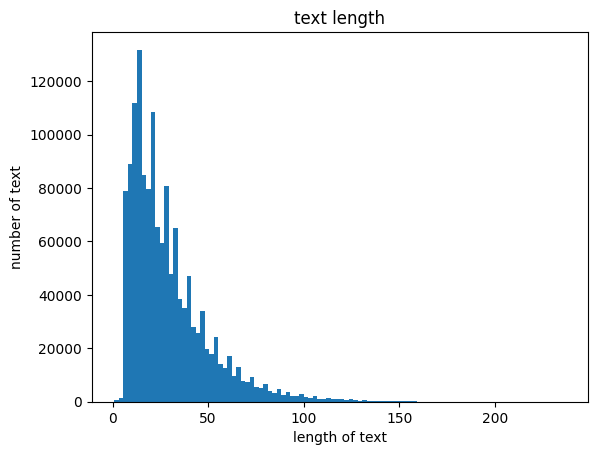

In [148]:
import matplotlib.pyplot as plt

plt.title('text length')
plt.hist(num_txt, bins=100)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_data['text'],text_data['label'],test_size=0.25)
print(len(x_train), len(x_test), len(y_train), len(y_test))

1069712 356571 1069712 356571


In [149]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to c:\users\admin\appdata\local\temp\pip-req-build-_noq65z7
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 

  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' 'C:\Users\Admin\AppData\Local\Temp\pip-req-build-_noq65z7'
ERROR: Could not find a version that satisfies the requirement onnxruntime<=1.8.0,==1.8.0 (from kobert) (from versions: 1.17.0, 1.17.1, 1.17.3, 1.18.0, 1.18.1, 1.19.0, 1.19.2)
ERROR: No matching distribution found for onnxruntime<=1.8.0,==1.8.0


In [ ]:
#GPU 사용
device = torch.device("cuda:0")

In [ ]:
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kober_model